In [1]:
import pandas as pd
import findspark
findspark.init()
import pyspark

from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
import pyspark.sql.functions as sqlfunc
from pyspark.sql.types import *
import argparse, sys
from pyspark.sql import *
import pandas as pd
from pyspark.sql import SQLContext

import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("data.csv")
df['user_id'].nunique()

31

In [37]:
df

,user_id,purchase_date,USD_spent,start_date,universe
0,d71e25,26/11/2017,50,22/11/2017,android
1,0c501b,24/11/2017,21,22/11/2017,android
2,1d81a3,24/11/2017,20,22/11/2017,android
3,a6b294,25/11/2017,13,22/11/2017,ios
4,a6b294,25/11/2017,13,22/11/2017,ios
5,a6b294,25/11/2017,13,22/11/2017,ios
6,6f14df,24/11/2017,13,22/11/2017,android
7,2.90E+11,23/11/2017,13,22/11/2017,ios
8,2.90E+11,23/11/2018,13,22/11/2018,ios
9,d71e25,26/11/2018,10,22/11/2018,android


In [3]:
df.shape

(58, 5)

In [83]:
df['purchase_date'].unique()

array(['26/11/2017', '24/11/2017', '25/11/2017', '23/11/2017',
       '23/11/2018', '26/11/2018', '27/11/2018', '25/11/2018',
       '24/11/2018', '22/11/2018', '28/11/2018'], dtype=object)

## removing year 2017 to prettify the graph

In [88]:
df = df[df['purchase_date'].str.slice(6,10)!='2017']

In [89]:
spark = SparkSession.builder.appName('pandasToSparkDF').getOrCreate()
dfspark = spark.createDataFrame(df)

In [90]:
dfspark.show()

+--------+-------------+---------+----------+--------+
| user_id|purchase_date|USD_spent|start_date|universe|
+--------+-------------+---------+----------+--------+
|2.90E+11|   23/11/2018|       13|22/11/2018|     ios|
|  d71e25|   26/11/2018|       10|22/11/2018| android|
|  7f07f0|   27/11/2018|       10|22/11/2018| android|
|  70210b|   25/11/2018|       10|22/11/2018| android|
|  0c501b|   24/11/2018|       10|22/11/2018| android|
|  0c501b|   24/11/2018|       10|22/11/2018| android|
|  03f67b|   24/11/2018|       10|22/11/2018|     ios|
|  0c501b|   25/11/2018|        9|22/11/2018| android|
|  6f14df|   24/11/2018|        8|22/11/2018| android|
|  e7dd68|   27/11/2018|        7|22/11/2018|     ios|
|  a6b294|   25/11/2018|        7|22/11/2018|     ios|
|  a6b294|   25/11/2018|        7|22/11/2018|     ios|
|  9e654c|   25/11/2018|        7|22/11/2018| android|
|  9e654c|   25/11/2018|        7|22/11/2018| android|
|  57a719|   22/11/2018|        7|22/11/2018|     ios|
|  56269c|

In [91]:
dfspark.registerTempTable("conversionTable")

- **total_purchase** are the total no. of purchases per universe per group
- **total_visitors** are the total no of unique users per universe
- putting both of the queries in CTE and the  selecting the purchase_date, universe and conversion_rate by joining wrt. universe to avoid repeated rows

In [109]:
query ="""

with total as (
select  universe, count( distinct user_id) as total_visitors
from conversionTable
group by universe
)
, purchase as(

select purchase_date,universe, count(*) as total_purchase
from conversionTable
group by universe, purchase_date
)

select purchase.purchase_date, purchase.universe, purchase.total_purchase,(purchase.total_purchase/ total.total_visitors ) as conversion_rate
from purchase
inner join  total
on purchase.universe = total.universe


"""

dffinal = spark.sql(query)
dffinal.show()


+-------------+--------+--------------+-------------------+
|purchase_date|universe|total_purchase|    conversion_rate|
+-------------+--------+--------------+-------------------+
|   23/11/2018| android|             1|0.07692307692307693|
|   25/11/2018| android|             6|0.46153846153846156|
|   27/11/2018| android|             1|0.07692307692307693|
|   28/11/2018| android|             1|0.07692307692307693|
|   22/11/2018| android|             3|0.23076923076923078|
|   24/11/2018| android|            13|                1.0|
|   26/11/2018| android|             2|0.15384615384615385|
|   27/11/2018|     ios|             3|0.16666666666666666|
|   23/11/2018|     ios|             6| 0.3333333333333333|
|   22/11/2018|     ios|             5| 0.2777777777777778|
|   26/11/2018|     ios|             3|0.16666666666666666|
|   28/11/2018|     ios|             1|0.05555555555555555|
|   25/11/2018|     ios|             3|0.16666666666666666|
|   24/11/2018|     ios|             2| 

In [110]:
df_plot = dffinal.toPandas()

In [111]:
df_ios=df_plot[(df_plot['universe']=='ios') ]
df_and=df_plot[(df_plot['universe']=='android')]

df_ios = df_ios.sort_values(by='purchase_date') 
df_and = df_and.sort_values(by='purchase_date')

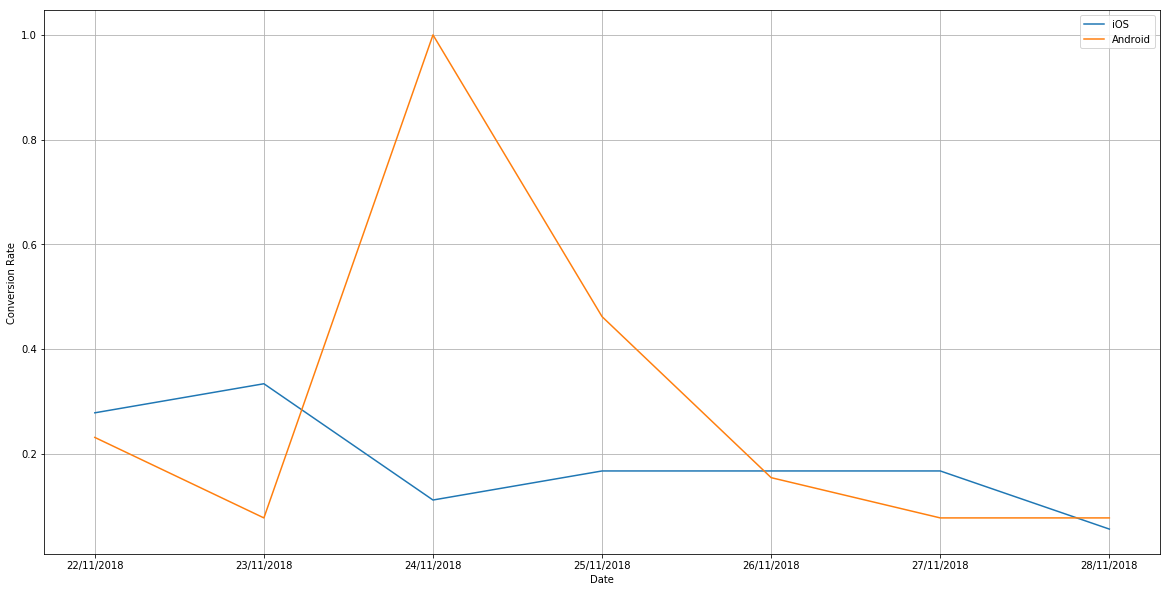

In [112]:
plt.figure(figsize=(20,10))

plt.plot(df_ios['purchase_date'],df_ios['conversion_rate'],label='iOS')
plt.plot(df_and['purchase_date'],df_and['conversion_rate'],label='Android')
plt.grid()

plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.legend()

## Question 1

Let's go over the definitions first:

- DAU - The measure used to find the number of *unique* daily users for the game.
- MAU - The measure used to find the number *unique* monthly users for the game.

Since the DAUs and MAU's are going down, it means that we are having a large amount of less active and new users coming and as well as most of them are churned, i.e they tend to not come back. Which essentially means, less number of new people are using the app everyday and they never come back on a month-to-month basis.


- For this we are going to have to first work entirely with retention data sets that show user session activity. 

- We need to look for retention within the month including anything from 3-day retention to 10-day retention and then figuring out when/why users are dropping off within the month.

There are several factors that could lead a user to be heavily engaged for a few days and then drop the game. 

- It could be that users are getting bored of content and are exhausting the game within a small time span. 
- It could also mean that the game's difficulty curve is rising too steeply.

Given the data we had above, we can check if people got *addicted* to the game for a few days and then drop off by checking the rentention; this is very important in focusing our initial direction on what to fix. Once we know the suspects, then we can delve into more game-specific data sets such as the difficulty curve or amount of algorithmically generated content produced for users.


Main reason is Churn - Actively checking our Decay Analysis
- Less 'Usage/engagement'
- Sessions made per user gets down mostly because of the product user's using

Can be improved by: 

- Change/beautification in the product
- Retain with catchy Push notifications
- Check the app reviews in Android/IOS app store and check the sentiment analysis


We can also do by:

- Checking DAU, MAU country wise- and then check region wise
- Check if there has been significantly decrease in DAU, MAU in a certain region. If yes, then figuring out the problem based on the region.

 Else, we can start our investigation by the following way. 


- Check what %  of users are active everyday last week? 
- What are they doing? How are you going to produce more of them?  
- Finding out- How the frequency of the use increases in correlation to any other feature- like weather, location, Operating System, gaming points, prices, ads?
- Check the drop of the active users daily and monthly and then also check the DAU and MAU of the competitors, to verify if the decrease of our users has lead to increase of their user. 

- Check customer usage time and pattern of some specific customers who used to use alot, but now decreased. 

- Try to reach out to the existing customers who might have churned to engage them back to the game. 

- AB test the game in many different aspects and decide which change in the app will increase more usage. 


Few ways to improve the activity of users by figuring out:


- How to Educate Users with Onboarding
- How to use Push Notifications and Deep Linking

- How to Boost User Activity with Frequent Updates and daily rewards
- How to Encourage Users to Reach Out and Learn More
